# required package

In [203]:
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)
if(!require(dplyr)) install.packages("dplyr")
library(dplyr)

In [204]:
if(!require(remotes)) install.packages("remotes")
if (!requireNamespace("descriptivestat", quietly = TRUE)) {
  remotes::install_github("agronomy4future/descriptivestat", force= TRUE)
}
library(remotes)
library(descriptivestat)

# data upload

In [205]:
if(!require(readr)) install.packages("readr")
library(readr)
github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/refs/heads/main/4_treatments_4_genotypes_with_4_blocks.csv"
df=data.frame(read_csv(url(github), show_col_types=FALSE))

head(df,5)

,Genotype,Block,Treatment,Yield
,<chr>,<chr>,<chr>,<dbl>
1,CV1,I,I,42.9
2,CV1,II,I,41.6
3,CV1,III,I,28.9
4,CV1,IV,I,30.8
5,CV2,I,I,53.3


# descriptive statistics

In [206]:
if(!require(dplyr)) install.packages("dplyr")
library(dplyr)

summary_stats= df %>%
                  group_by(Genotype, Treatment) %>%
                     summarise(
                       n= length(Yield),
                       mean= mean(Yield, na.rm= TRUE),
                       variance= var(Yield, na.rm= TRUE),
                       sd= sd(Yield, na.rm= TRUE),
                       se= sd / sqrt(n),
                       ci_lower= mean - qt(0.975, df= n-1)*se,
                       ci_upper= mean + qt(0.975, df= n-1)*se,
                       cv= sd/mean,
                       q25= quantile(Yield, probs= 0.25, na.rm=TRUE),
                        .groups= "drop")

print(summary_stats)

# A tibble: 16 × 11
   Genotype Treatment     n  mean variance    sd    se ci_lower ci_upper     cv
   <chr>    <chr>     <int> <dbl>    <dbl> <dbl> <dbl>    <dbl>    <dbl>  <dbl>
 1 CV1      I             4  36.0     52.1  7.22  3.61     24.6     47.5 0.200 
 2 CV1      II            4  50.6     45.3  6.73  3.37     39.9     61.3 0.133 
 3 CV1      III           4  45.8     48.2  6.94  3.47     34.8     56.9 0.151 
 4 CV1      IV            4  37.3     52.8  7.27  3.63     25.7     48.9 0.195 
 5 CV2      I             4  50.8    212.  14.6   7.28     27.7     74.0 0.286 
 6 CV2      II            4  55.4    129.  11.4   5.68     37.3     73.5 0.205 
 7 CV2      III           4  53.1    134.  11.6   5.79     34.7     71.5 0.218 
 8 CV2      IV            4  54.3     72.3  8.50  4.25     40.8     67.8 0.157 
 9 CV3      I             4  53.9     63.7  7.98  3.99     41.2     66.6 0.148 
10 CV3      II            4  51.4     69.3  8.33  4.16     38.1     64.6 0.162 
11 CV3      III     

# descriptivestat() package

In [207]:
df1= descriptivestat(data= df, group_vars= c("Genotype", "Treatment"),
                     value_vars= c("Yield"),
                     output_stats= c("v","sd","se","ci","cv","iqr"))

print(head(df1, 7))

# A tibble: 7 × 15
  Genotype Block Treatment Yield category group_id v.Yield sd.Yield se.Yield
  <chr>    <chr> <chr>     <dbl> <chr>    <chr>      <dbl>    <dbl>    <dbl>
1 CV1      NA    I          36.0 mean     CV1_I       52.1     7.22     3.61
2 CV1      I     I          42.9 observed CV1_I       NA      NA       NA   
3 CV1      II    I          41.6 observed CV1_I       NA      NA       NA   
4 CV1      III   I          28.9 observed CV1_I       NA      NA       NA   
5 CV1      IV    I          30.8 observed CV1_I       NA      NA       NA   
6 CV1      NA    II         50.6 mean     CV1_II      45.3     6.73     3.37
7 CV1      I     II         53.8 observed CV1_II      NA      NA       NA   
# ℹ 6 more variables: LCI.Yield <dbl>, UCI.Yield <dbl>, cv.Yield <dbl>,
#   Q1.Yield <dbl>, Q2.Yield <dbl>, Q3.Yield <dbl>


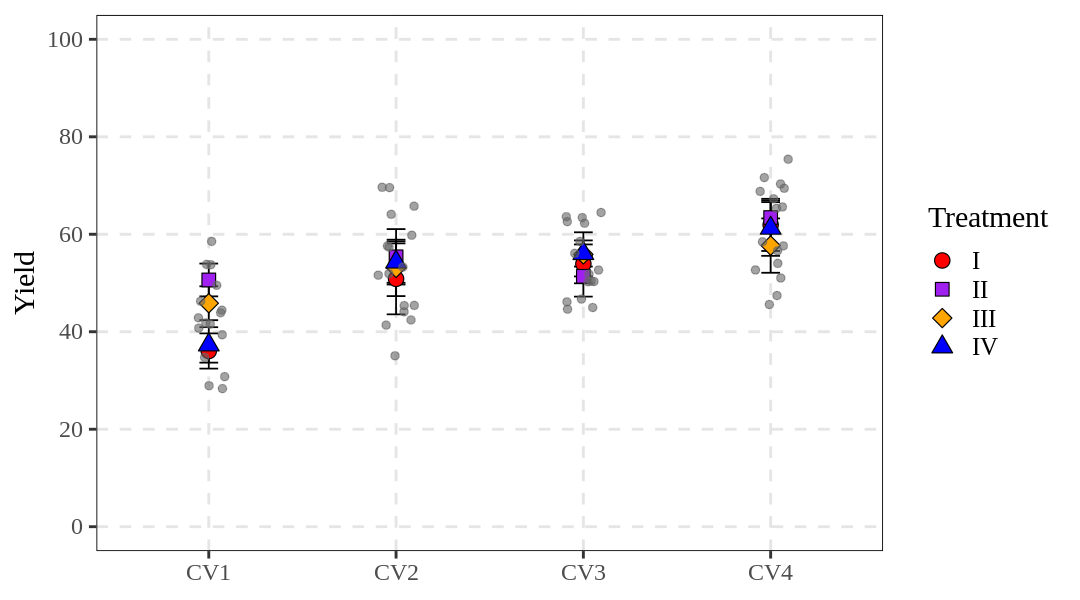

In [208]:
Fig1= ggplot() +
   # Error bars for means
  geom_errorbar(data= subset(df1, category=="mean"),
                aes(x= Genotype, ymin= Yield-se.Yield, ymax=Yield+se.Yield),
                width= 0.1, color= "black") +

  # Mean points (colored)
  geom_point(data= subset(df1, category=="mean"),
             aes(x= Genotype, y= Yield, fill= Treatment, shape=Treatment),
             size=4, color="black") +

  scale_fill_manual(name="Treatment", values= c("I"="red", "II"="purple", "III"="orange", "IV"="blue")) +
  scale_shape_manual(name="Treatment", values = c("I"=21, "II"=22, "III"=23, "IV"=24)) +

  geom_jitter(data= subset(df1, category=="observed"),
              aes(x= Genotype, y= Yield), width=0.1, alpha=0.6,
              size=2, color="gray40") +

  scale_y_continuous(breaks=seq(0,100,20), limits = c(0,100)) +
  labs(x= NULL, y="Yield") +
  theme_classic(base_size=18, base_family="serif") +
  theme(
    legend.position="right",
    #legend.title=element_blank(),
    #axis.text.x = element_text(angle= 90, vjust= 0.5, hjust= 1),
    legend.key=element_rect(color="white", fill="white"),
    legend.text=element_text(family="serif", face="plain",
                             size=15, color= "black"),
    legend.background=element_rect(fill=alpha("white", 0.5)),
    strip.background= element_rect(color= "black", fill="grey75",
                      linewidth= 0.5, linetype="solid"),
    panel.border= element_rect(color="black", fill=NA, linewidth=0.5),
    panel.grid.major= element_line(color="grey90", linetype="dashed"),
    axis.line= element_blank()
  )

options(repr.plot.width=9, repr.plot.height=5)
print(Fig1)

ggsave("Fig1.png", plot= Fig1, width=9, height= 5, dpi= 300)

# data upload (big data)

In [209]:
if(!require(readr)) install.packages("readr")
library(readr)
github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/refs/heads/main/wheat_grain_grea_and_heat_tolerance.csv"
df3=data.frame(read_csv(url(github), show_col_types=FALSE))
df3= subset(df3, select = -tolerance)
print(tail(df3,5))

     genotype     thinning  area
7970      cv2 manipulation 19.71
7971      cv2 manipulation 16.40
7972      cv2 manipulation 21.38
7973      cv2 manipulation 14.33
7974      cv2 manipulation 10.83


# descriptivestat() package

In [210]:
df4= descriptivestat(data= df3, group_vars= c("genotype", "thinning"),
                     value_vars= c("area"),
                     output_stats= c("sd","iqr"))

print(head(df4, 5))

# A tibble: 5 × 9
  genotype thinning  area category group_id    sd.area Q1.area Q2.area Q3.area
  <chr>    <chr>    <dbl> <chr>    <chr>         <dbl>   <dbl>   <dbl>   <dbl>
1 cv1      control  17.8  mean     cv1_control    2.97    16.1    18.2    20.0
2 cv1      control   7.56 observed cv1_control   NA       NA      NA      NA  
3 cv1      control   7.25 observed cv1_control   NA       NA      NA      NA  
4 cv1      control   7.99 observed cv1_control   NA       NA      NA      NA  
5 cv1      control   5.86 observed cv1_control   NA       NA      NA      NA  


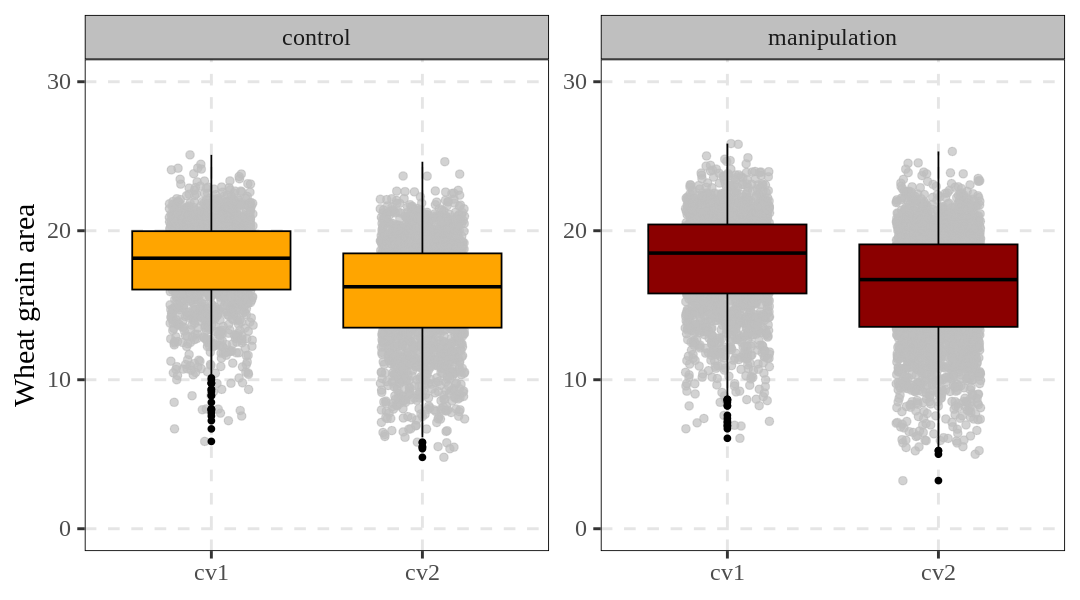

In [211]:
Fig2= ggplot(data=df3, aes(x= genotype, y=area)) +
  geom_jitter(aes(x= genotype, y= area), width=0.2, alpha=0.7,
              size=2, color="gray75") +
  geom_boxplot(aes(fill= thinning, color= thinning), color="black") +
  scale_fill_manual(name="Thinning", values= c("control"="orange", "manipulation"="darkred")) +
  scale_y_continuous(breaks=seq(0,30,10), limits = c(0,30)) +
  facet_wrap(~ thinning, scales = "free") +
  labs(x= NULL, y="Wheat grain area") +
  theme_classic(base_size=18, base_family="serif") +
  theme(
    legend.position="none",
    legend.key=element_rect(color="white", fill="white"),
    legend.text=element_text(family="serif", face="plain",
                             size=15, color= "black"),
    legend.background=element_rect(fill=alpha("white", 0.5)),
    strip.background= element_rect(color= "black", fill="grey75",
                      linewidth= 0.5, linetype="solid"),
    panel.border= element_rect(color="black", fill=NA, linewidth=0.5),
    panel.grid.major= element_line(color="grey90", linetype="dashed"),
    axis.line= element_blank())

options(repr.plot.width=9, repr.plot.height=5)
print(Fig2)


ggsave("Fig2.png", plot= Fig2, width=9, height= 5, dpi= 300)

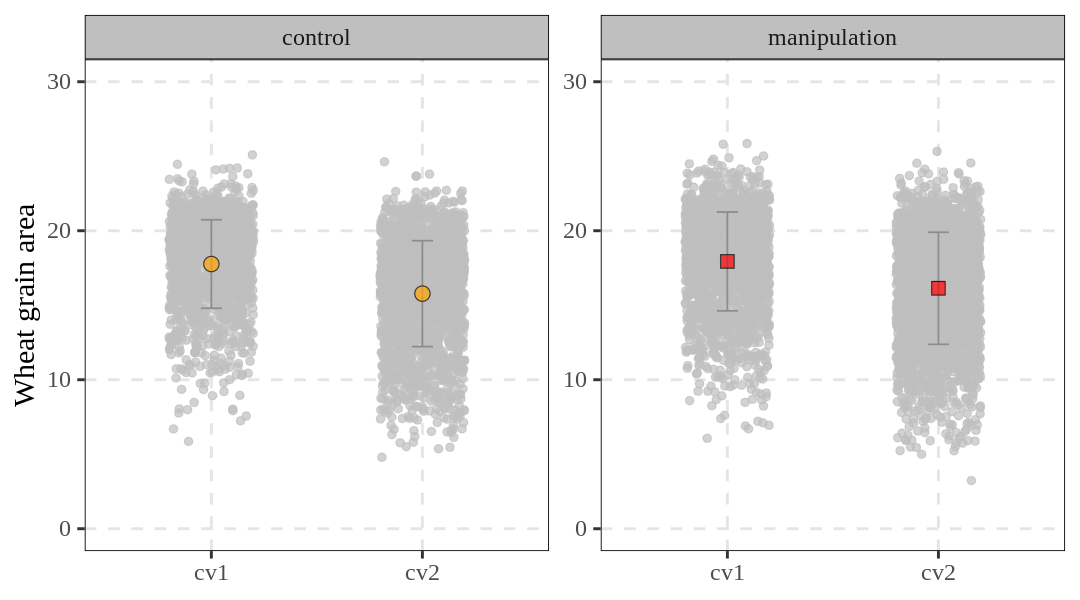

In [212]:
Fig3= ggplot() +

  # Observed data (gray jittered points)
  geom_jitter(data= subset(df4, category=="observed"),
              aes(x= genotype, y= area), width=0.2, alpha=0.7,
              size=2, color="gray75") +

  # Error bars for means
  geom_errorbar(data= subset(df4, category=="mean"),
                aes(x= genotype, ymin= area-sd.area, ymax=area+sd.area),
                width= 0.1, color= "grey55") +

  # Mean points (colored)
  geom_point(data= subset(df4, category=="mean"),
             aes(x= genotype, y= area, fill= thinning, shape=thinning),
             size=4, color="black", alpha=0.7) +

  scale_fill_manual(name="Thinning", values= c("control"="orange", "manipulation"="red")) +
  scale_shape_manual(name="Thinning", values = c("control"=21, "manipulation"=22)) +

  scale_y_continuous(breaks=seq(0,30,10), limits = c(0,30)) +
  facet_wrap(~ thinning, scales = "free") +
  labs(x= NULL, y="Wheat grain area") +
  theme_classic(base_size=18, base_family="serif") +
  theme(
    legend.position="none",
    #legend.title=element_blank(),
    #axis.text.x = element_text(angle= 90, vjust= 0.5, hjust= 1),
    legend.key=element_rect(color="white", fill="white"),
    legend.text=element_text(family="serif", face="plain",
                             size=15, color= "black"),
    legend.background=element_rect(fill=alpha("white", 0.5)),
    strip.background= element_rect(color= "black", fill="grey75",
                      linewidth= 0.5, linetype="solid"),
    panel.border= element_rect(color="black", fill=NA, linewidth=0.5),
    panel.grid.major= element_line(color="grey90", linetype="dashed"),
    axis.line= element_blank()
  )

options(repr.plot.width=9, repr.plot.height=5)
print(Fig3)

ggsave("Fig3.png", plot= Fig3, width=9, height= 5, dpi= 300)

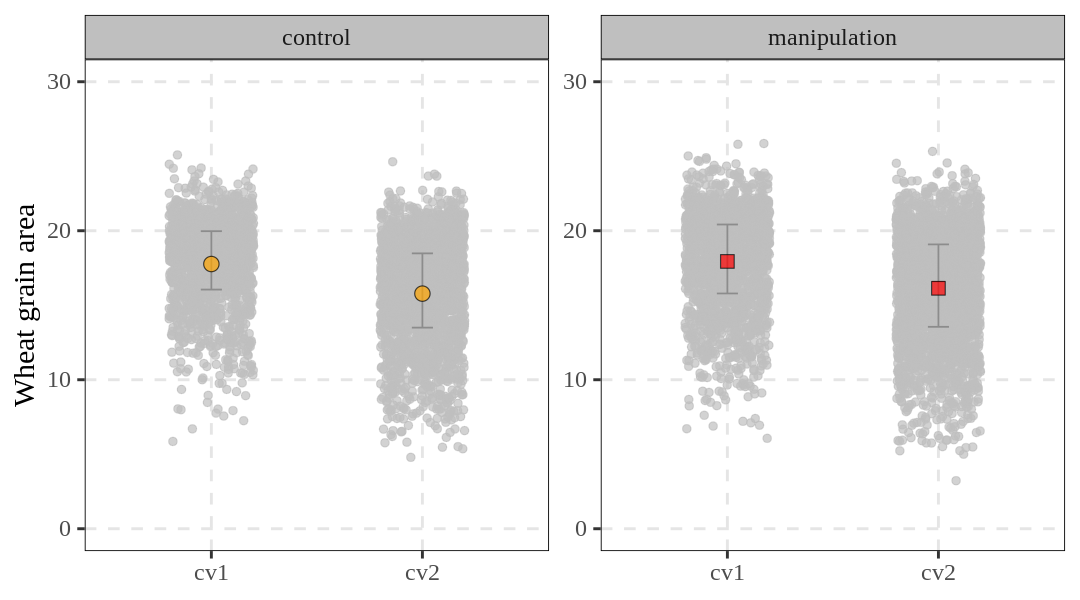

In [213]:
Fig4= ggplot() +

  # Observed data (gray jittered points)
  geom_jitter(data= subset(df4, category=="observed"),
              aes(x= genotype, y= area), width=0.2, alpha=0.7,
              size=2, color="gray75") +

  # Error bars for means
  geom_errorbar(data= subset(df4, category=="mean"),
                aes(x= genotype, ymin= area-(area-Q1.area), ymax=area+(Q3.area-area)),
                width= 0.1, color= "grey55") +

  # Mean points (colored)
  geom_point(data= subset(df4, category=="mean"),
             aes(x= genotype, y= area, fill= thinning, shape=thinning),
             size=4, color="black", alpha=0.7) +

  scale_fill_manual(name="Thinning", values= c("control"="orange", "manipulation"="red")) +
  scale_shape_manual(name="Thinning", values = c("control"=21, "manipulation"=22)) +

  scale_y_continuous(breaks=seq(0,30,10), limits = c(0,30)) +
  facet_wrap(~ thinning, scales = "free") +
  labs(x= NULL, y="Wheat grain area") +
  theme_classic(base_size=18, base_family="serif") +
  theme(
    legend.position="none",
    #legend.title=element_blank(),
    #axis.text.x = element_text(angle= 90, vjust= 0.5, hjust= 1),
    legend.key=element_rect(color="white", fill="white"),
    legend.text=element_text(family="serif", face="plain",
                             size=15, color= "black"),
    legend.background=element_rect(fill=alpha("white", 0.5)),
    strip.background= element_rect(color= "black", fill="grey75",
                      linewidth= 0.5, linetype="solid"),
    panel.border= element_rect(color="black", fill=NA, linewidth=0.5),
    panel.grid.major= element_line(color="grey90", linetype="dashed"),
    axis.line= element_blank()
  )

options(repr.plot.width=9, repr.plot.height=5)
print(Fig4)

ggsave("Fig4.png", plot= Fig4, width=9, height= 5, dpi= 300)